<a href="https://colab.research.google.com/github/JonathanPhillips/NBA_Finals_Sim/blob/main/NBAFinalsSimulation_Bos_GS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import random as rnd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
gdf = pd.read_csv('/content/stats_nba_com-teamgamelogs-2021_22-regular_season.csv')

In [3]:
gdf.columns

Index(['SEASON_YEAR', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS',
       'OPP_PTS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK',
       'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK',
       'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK',
       'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK',
       'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK'],
      dtype='object')

In [4]:
gdf['GAME_DATE'] = pd.to_datetime(gdf['GAME_DATE'])

In [5]:
gswdf = gdf[gdf.TEAM_ABBREVIATION == 'GSW']
bosdf = gdf[gdf.TEAM_ABBREVIATION == 'BOS']

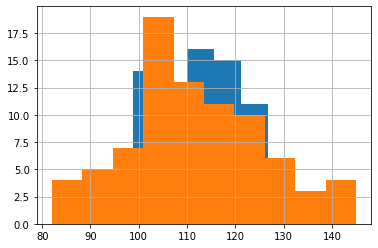

In [8]:
gswdf.PTS.hist()
bosdf.PTS.hist()

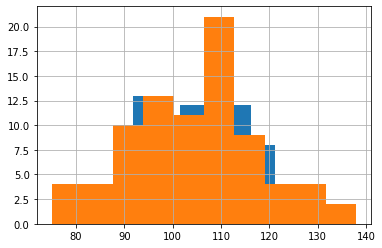

In [9]:
gswdf.OPP_PTS.hist()
bosdf.OPP_PTS.hist()

In [12]:
gswmeanpts = gswdf.PTS.mean()
bosmeanpts = bosdf.PTS.mean()
gswsdpts = gswdf.PTS.std()
bosdpts = bosdf.PTS.std()

gswmeanopp = gswdf.OPP_PTS.mean()
bosmeanopp = bosdf.OPP_PTS.mean()
gswsdopp = gswdf.OPP_PTS.std()
bossdopp = bosdf.OPP_PTS.std()

print("Golden State Points Mean ", gswmeanpts)
print("Golden State Points SD ", gswsdpts)
print("Boston Points Mean ", bosmeanpts)
print("Boston Points SD ", bosdpts)

print("Golden State OppPoints Mean ", gswmeanopp)
print("Golden State OppPoints SD ", gswsdopp)
print("Boston OppPoints Mean ", bosmeanopp)
print("Boston OppPoints SD ", bossdopp)

Golden State Points Mean  111.0
Golden State Points SD  11.777777777777779
Boston Points Mean  111.7560975609756
Boston Points SD  14.147862008012796
Golden State OppPoints Mean  105.46341463414635
Golden State OppPoints SD  11.129091143386683
Boston OppPoints Mean  104.47560975609755
Boston OppPoints SD  13.385292840966242


In [16]:
def gameSim():
    GSWScore = (rnd.gauss(gswmeanpts,gswsdpts)+ rnd.gauss(bosmeanopp,bossdopp))/2
    BOSScore = (rnd.gauss(bosmeanpts,bosdpts)+ rnd.gauss(gswmeanopp,gswsdopp))/2
    if int(round(GSWScore)) > int(round(BOSScore)):
        return 1
    elif int(round(GSWScore)) < int(round(BOSScore)):
        return -1
    else: return 0

In [17]:
def gamesSim(ns):
    gamesout = []
    team1win = 0
    team2win = 0
    tie = 0
    for i in range(ns):
        gm = gameSim()
        gamesout.append(gm)
        if gm == 1:
            team1win +=1 
        elif gm == -1:
            team2win +=1
        else: tie +=1 
    print('GSW Win ', team1win/(team1win+team2win+tie),'%')
    print('BOS Win ', team2win/(team1win+team2win+tie),'%')
    print('Tie ', tie/(team1win+team2win+tie), '%')
    return gamesout
        

In [21]:
gamesSim(100000)

GSW Win  0.45609 %
BOS Win  0.51261 %
Tie  0.0313 %


[1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 0,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 0,
 1,
 1,
 1,
 1,
 -1,
 0,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 0,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 0,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1